# Differencial equations

## Numerical integration

This part cover the chapter 1.8 page 36 to 52 of the book "Orbital mechanics for Engineering Students" (ISBN: 978-0-08-097747-a)

In the book the presented example is a system with a masse, a string and a damper. 

The equation of the model is the following:
\begin{equation}
\ddot{x} + 2\zeta \omega_n\dot{x} + \omega_n^2 x = \frac{F(t)}{m}
\end{equation}
$F(t)$ is a sinusoidal force of an amplitufe of $F_0$ and a circular frequency of $\omega$.

The solution of this differential equation is:
\begin{equation}
x = e^{-\zeta \omega_n t} (A\sin{\omega_d t}+ B\cos{\omega_d t}) \
    + \frac{F_0/m}{(\omega_n^2 - \omega^2)^2 + (2\omega \omega_n \zeta)^2} \
    [(\omega_n^2 - \omega^2)\sin{\omega t} - 2 \omega \omega_n \zeta \cos{\omega t}]
\end{equation}

With
$$ A = \zeta \frac{\omega_n}{\omega_d} x_0 + \frac{\dot{x}_0}{\omega_d} \
    + \frac{\omega^2 + (2\zeta^2 - 1)\omega_n^2} \
           {(\omega_n^2 - \omega^2)^2 + (2\omega\omega_n \zeta)^2} \
     \frac{\omega}{\omega_d} \
    \frac{F_0}{m}$$
    
and
$$ B = x_0 + \frac{2 \omega \omega_n \zeta}{(\omega_n^2 - \omega^2)^2 + (2 \omega \omega_n \zeta)^2} \
        \frac{F_0}{m}$$
        
with $$ \omega_d = \omega_n \sqrt{1-\zeta^2}$$

### Example

Example for t=0 to t=110

$m = 1 kg$

$\omega_n = 1 rad/s$

$\zeta = 0.03$

$F_0 = 1N$

$\omega = 0.4 rad/s$

and for initial condition $x = \dot{x} =0$

Representation with Python

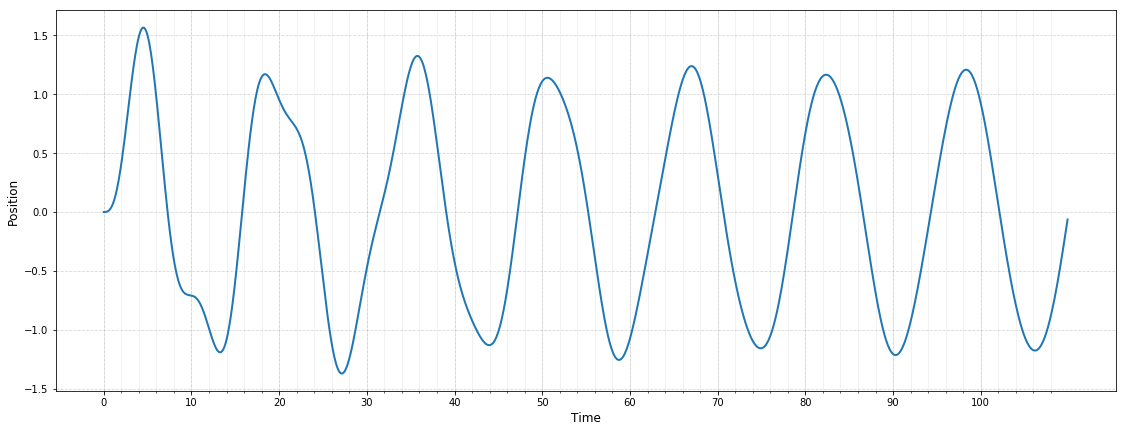

In [43]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt

def general_x(t, x_0, xdot_0,  m, zeta, omega_n, omega, F_0):
    omega_d = omega_n * math.sqrt(1-zeta**2)
    
    A = zeta*(omega_n/omega_d)*x_0 + xdot_0 / omega_d \
    + (omega**2 + (2*zeta**2 - 1)*omega_n**2) / (((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2)) \
    * (omega / omega_d) * (F_0 / m)
    
    B = x_0 + ((2*omega*omega_n*zeta) / (((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2))) * (F_0 / m)
    
    y = math.exp(-zeta * omega_n * t)*(A*math.sin(omega_d*t) + B*math.cos(omega_d*t)) \
        + ((F_0 / m)/((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2)) \
        * ((omega_n**2 - omega**2) * math.sin(omega*t) - (2*omega*omega_n*zeta*math.cos(omega*t)))
    return y

def x(t=0):
    x_0 = 0
    xdot_0 = 0
    m = 1
    zeta = 0.03
    omega = 0.4
    omega_n = 1
    F_0 = 1
    
    return general_x(t, x_0, xdot_0,  m, zeta, omega_n, omega, F_0)

t0 = 0.0
t_end = 110.0
step = 0.1

y_exact = []

t_exact = np.arange(t0, t_end, step)

for i in t_exact:
    y_exact.append(x(i))

major_xticks = np.arange(0, 110, 10)                                              
minor_xticks = np.arange(0, 110, 2)                                                   
    
fig, ax = plt.subplots(figsize=(19,7))

ax.set_xticks(major_xticks)                                                       
ax.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax.grid(linestyle='--')
ax.plot(t_exact, y_exact, linewidth=2)
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5) 
ax.tick_params(labelsize=10)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.show()

## Runge-Kutta Algorithm

Please refere to page 41 for the details.

In [44]:
import copy
import numpy as np
import math

def rk1_4(ode_function, tspan, y0, h, rk):
    '''Runge_Kutta numerical integration algorithm
    
    Parameters:
        ode_function: derivate of f
        tspan: vector [t0, tf] giving the time interval for the solution
        y0: vector of the initial value of y
        h: time step
        rk: rank from 1 to 4 (RK1 Euler's method, RK2 Heun's method, RK3, RK4)'''
    
    if rk == 1:
        n_stage = 1
        a = np.array((0,))
        b = np.array((0,))
        c = np.array((1,))
    elif rk == 2:
        n_stage = 2
        a = np.array( (0, 1.0) )
        b = np.array( ((0, 0), \
                       (1.0, 0)) ) 
        c = np.array( (1/2.0, 1/2.0) )
    elif rk == 3:
        n_stage = 3
        a = np.array( (0, 1/2.0, 1) )
        b = np.array( ((0, 0), \
            (1/2.0, 0), \
            (-1.0, 2.0)) )
        c = np.array( (1/6.0, 2/3.0, 1/6.0) )
    elif rk == 4:
        n_stage = 4
        a = np.array( (0, 1/2.0, 1/2.0, 1) )
        b = np.array( ((0, 0, 0), \
            (1/2.0, 0, 0), \
            (0, 1/2.0, 0), \
            (0, 0, 1.0)) )
        c = np.array( (1/6.0, 1/3.0, 1/3.0, 1/6.0))
    else:
        raise ValueError('The rank must be 1 ,2 ,3 or 4.')
    
    t0 = tspan[0]
    tf = tspan[1]
    t = t0
    y = np.array(y0)
    tout = [t]
    yout = [y]
    
    while t < tf:
        f = []
        ti = t
        yi = y
        for i in range(1, n_stage+1):
            t_inner = ti + a[i-1]*h
            y_inner = copy.copy(yi)
            for j in range(1, i):
                y_inner = y_inner + h*b[i-1][j-1] * f[j-1]
            f.append(ode_function(t_inner, y_inner))

        h = min(h, tf - t)
        t = t + h 
        fmat = np.array(f).T
        yimat = yi
        y = yimat + h * np.dot(fmat, c.reshape(len(c), 1)).T[0]
        tout.append(t)
        yout.append(y)
        
    
    return tout, yout

In [45]:
def rates(t, f):
    #print("f =" ,f)
    #print("t =", t)
    #print("---------------")
    x = f[0]
    Dx = f[1]
    
    m = 1
    z = 0.03
    wn = 1
    Fo = 1
    w = 0.4*wn
    
    D2x = Fo/m*math.sin(w*t) - 2*z*wn*Dx - x*wn**2
    
    #print("x = ", x, " Dx = ", Dx, " D2x = ", D2x)
    
    return np.array((Dx, D2x))

sol_rk1_1 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.01, 1)
sol_rk1_2 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.1, 1)

sol_rk2_1 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.1, 2)
sol_rk2_2 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.5, 2)

sol_rk3_1 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.5, 3)
sol_rk3_2 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.1, 3)

sol_rk4_1 = rk1_4(rates, [0, 110], [0.0, 0.0], 1, 4)
sol_rk4_2 = rk1_4(rates, [0, 110], [0.0, 0.0], 2, 4)

Plot the results.

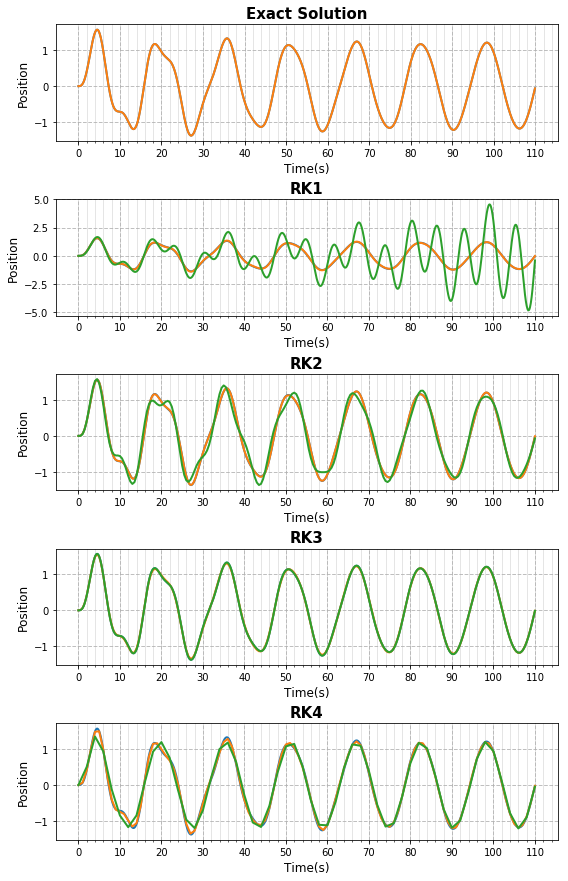

In [65]:
%matplotlib inline

t_rk1_1 = sol_rk1_1[0]
t_rk1_2 = sol_rk1_2[0]
t_rk2_1 = sol_rk2_1[0]
t_rk2_2 = sol_rk2_2[0]
t_rk3_1 = sol_rk3_1[0]
t_rk3_2 = sol_rk3_2[0]
t_rk4_1 = sol_rk4_1[0]
t_rk4_2 = sol_rk4_2[0]

y_rk1_1 = []
for i in sol_rk1_1[1]:
    y_rk1_1.append(i[0])

y_rk1_2 =[]
for i in sol_rk1_2[1]:
    y_rk1_2.append(i[0])
    
y_rk2_1 =[]
for i in sol_rk2_1[1]:
    y_rk2_1.append(i[0])
    
y_rk2_2 =[]
for i in sol_rk2_2[1]:
    y_rk2_2.append(i[0])
    
y_rk3_1 =[]
for i in sol_rk3_1[1]:
    y_rk3_1.append(i[0])

y_rk3_2 =[]
for i in sol_rk3_2[1]:
    y_rk3_2.append(i[0])

y_rk4_1 =[]
for i in sol_rk4_1[1]:
    y_rk4_1.append(i[0])
    
y_rk4_2 =[]
for i in sol_rk4_2[1]:
    y_rk4_2.append(i[0])
    
fig = plt.figure(figsize=(9,15))
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
major_xticks = np.arange(0, 120, 10)                                              
minor_xticks = np.arange(0, 120, 2)  

'Plot the exact solution'
ax_exact = fig.add_subplot(511)
ax_exact.set_xticks(major_xticks)                                                       
ax_exact.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_exact.grid(linestyle='--')
ax_exact.plot(t_exact, y_exact, linewidth=2)
ax_exact.set_title("Exact Solution", fontsize=15, fontweight="bold")
plt.plot(t_exact, y_exact, linewidth=2)
ax_exact.grid(which='minor', alpha=0.4)                                                
ax_exact.grid(which='major', alpha=0.8,linewidth=1) 
ax_exact.tick_params(labelsize=10)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Position', fontsize=12)

#Plot the RK1
ax_RK1 = fig.add_subplot(512)
#ax = plt.subplots(figsize=(40,10))

ax_RK1.set_xticks(major_xticks)                                                       
ax_RK1.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_RK1.grid(linestyle='--')
ax_RK1.plot(t_exact, y_exact, linewidth=2)
ax_RK1.set_title("RK1", fontsize=15, fontweight="bold")
plt.plot(t_rk1_1, y_rk1_1, linewidth=2)
plt.plot(t_rk1_2, y_rk1_2, linewidth=2)
ax_RK1.grid(which='minor', alpha=0.4)                                                
ax_RK1.grid(which='major', alpha=0.8,linewidth=1) 
ax_RK1.tick_params(labelsize=10)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Position', fontsize=12)

#Plot the RK2
ax_RK2 = fig.add_subplot(513)
#ax = plt.subplots(figsize=(40,10))

ax_RK2.set_xticks(major_xticks)                                                       
ax_RK2.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_RK2.grid(linestyle='--')

ax_RK2.set_title("RK2", fontsize=15, fontweight="bold")
ax_RK2.plot(t_exact, y_exact, linewidth=2)
plt.plot(t_rk2_1, y_rk2_1, linewidth=2)
plt.plot(t_rk2_2, y_rk2_2, linewidth=2)
ax_RK2.grid(which='minor', alpha=0.4)                                                
ax_RK2.grid(which='major', alpha=0.8,linewidth=1) 
ax_RK2.tick_params(labelsize=10)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Position', fontsize=12)

#Plot the RK3
ax_RK3 = fig.add_subplot(514)
#ax = plt.subplots(figsize=(40,10))

ax_RK3.set_xticks(major_xticks)                                                       
ax_RK3.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_RK3.grid(linestyle='--')
ax_RK3.plot(t_exact, y_exact, linewidth=2)
ax_RK3.set_title("RK3", fontsize=15, fontweight="bold")
plt.plot(t_rk3_1, y_rk3_1, linewidth=2)
plt.plot(t_rk3_2, y_rk3_2, linewidth=2)
ax_RK3.grid(which='minor', alpha=0.4)                                                
ax_RK3.grid(which='major', alpha=0.8,linewidth=1) 
ax_RK3.tick_params(labelsize=10)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Position', fontsize=12)

#Plot the RK4
ax_RK4 = fig.add_subplot(515)
#ax = plt.subplots(figsize=(40,10))

ax_RK4.set_xticks(major_xticks)                                                       
ax_RK4.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)
ax_RK4.grid(linestyle='--')
ax_RK4.plot(t_exact, y_exact, linewidth=2)
ax_RK4.set_title("RK4", fontsize=15, fontweight="bold")
plt.plot(t_rk4_1, y_rk4_1, linewidth=2)
plt.plot(t_rk4_2, y_rk4_2, linewidth=2)
ax_RK4.grid(which='minor', alpha=0.4)                                                
ax_RK4.grid(which='major', alpha=0.8,linewidth=1) 
ax_RK4.tick_params(labelsize=10)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Position', fontsize=12)


plt.show()


## Heun's Predicator

Please refere to page 47

In [47]:
def heun(ode_function, tspan, y0, h):
    '''Heun's numerical integration algorithm
    
    Parameters:
        ode_function: derivate of f
        tspan: vector [t0, tf] giving the time interval for the solution
        y0: vector of the initial value of y
        h: time step
    '''
    tol = 1.0e-6
    itermax = 100
    
    t0 = tspan[0]
    tf = tspan[1]
    t = t0
    y = y0
    tout = [t]
    yout = [y]
    
    while t < tf:
        #h = min(t, tf - t)
        t1 = t
        y1 = y
        f1 = ode_function(t1, y1)
        y2 = y1 + f1*h
        t2 = t1 + h
        err = tol + 1
        iteration = 0
        while (err > tol) and (iteration <= itermax):
            y2p = y2
            f2 = ode_function(t2, y2p)
            favg = (f1 + f2) / 2.0
            y2 = y1 + favg * h
            err = max(abs(y2 - y2p)/(y2 + np.spacing(1)))
            iteration = iteration + 1
            
        if iteration > itermax:
            raise ValueError('Iteration limit reached')
        
        t = t + h
        y = y2
        tout.append(t)
        yout.append(y)
    
    return tout, yout

In [48]:
sol_heun = heun(rates, [0, 110], [0.0, 0.0], 0.1)

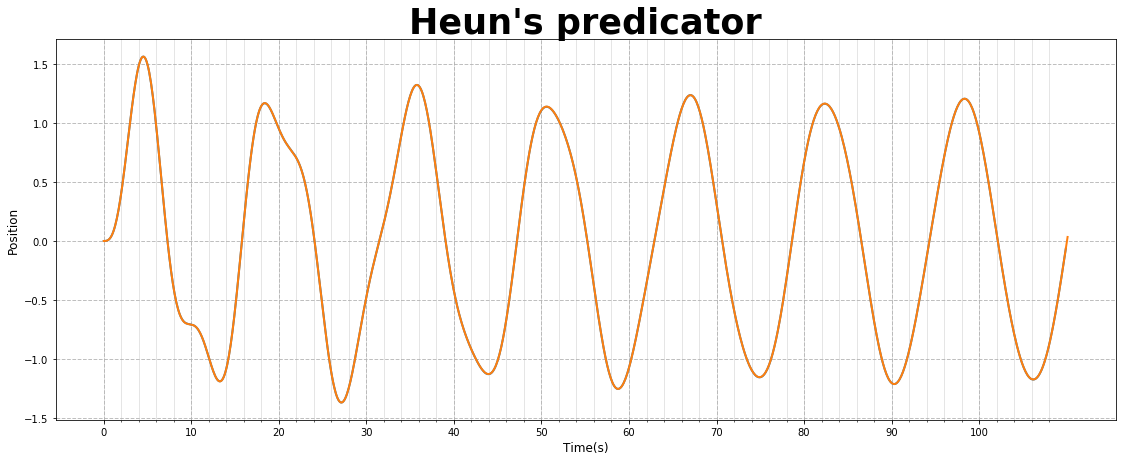

In [64]:
t_heun = sol_heun[0]
y_heun = []
for i in sol_heun[1]:
    y_heun.append(i[0])

major_xticks = np.arange(0, 110, 10)                                              
minor_xticks = np.arange(0, 110, 2)                                                   
    
fig, ax = plt.subplots(figsize=(19,7))
ax.set_title("Heun's predicator", fontsize=35, fontweight="bold")
ax.set_xticks(major_xticks)                                                       
ax.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax.grid(linestyle='--')
ax.plot(t_exact, y_exact, linewidth=2)
ax.plot(t_heun, y_heun, linewidth=2)
ax.grid(which='minor', alpha=0.4)                                                
ax.grid(which='major', alpha=0.8,linewidth=1) 
ax.tick_params(labelsize=10)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Position', fontsize=12)

plt.show()    
 

## Runge-Kutta-Fehlberg 4(5)

In [50]:
import numpy as np
import math

def rkf45(ode_function, tspan, y0, tolerance=0):
    '''Runge-Kutta-Fehlberg 4(5) numerical integration algorithm
    
    Parameters:
        ode_function: derivate of f
        tspan: vector [t0, tf] giving the time interval for the solution
        y0: vector of the initial value of y
        tolerance: 
    '''
    a = (0, 1/4.0, 3/8.0, 12/13.0, 1.0, 1/2.0)
    b = ( (0, 0, 0, 0, 0), \
        (1/4.0, 0, 0, 0, 0), \
        (3/32.0, 9/32.0, 0, 0, 0), \
        (1932/2197.0, -7200/2197.0, 0, 0), \
        (439/216.0, -8, 3680/513.0, -845/4104.0, 0), \
        (-8/27.0, 2, -3544/2565.0, 1859/4104.0, -11/40.0) )
    c4 = np.array((25/216.0, 0, 1408/2565.0, 2197/4104.0, -1/5.0, 0))
    c5 = np.array((16/135.0, 0, 6656/12825.0, 28561/56430.0, -9/50.0, 2/55.0))
    
    if tolerance == 0:
          tolerance = 1.0e-8
          
    t0 = tspan[0]
    tf = tspan[1]
          
    t = t0
    y = np.array(y0)
    tout = [t]
    yout = [y]
    
    # Initial step
    h = (tf - t0)/100.0
    
    while t < tf:
        f = []
        hmin = 16 * np.spacing(1)
        ti = t
        yi = y
        for i in range(1,7):
            t_inner = ti + a[i-1]*h
            y_inner = yi
            for j in range(1, i):
                y_inner = y_inner + h*b[i-1][j-1] * f[j-1]
            f.append(ode_function(t_inner, y_inner))
        
        fmat = np.array(f).T
        te = h * np.dot(fmat, (c4 - c5).reshape(len(c4), 1)).T[0]
        
        te_max = max(map(abs, te))
        
        ymax = max(map(abs, y))
        
        te_allowed = tolerance * max(ymax, 1.0)
        delta = (te_allowed/ (te_max + np.spacing(1)))**(1/5.0)
        
        if te_max <= te_allowed:
            h = min(h, tf-t)
            t = t + h
            y = yi + h * np.dot(fmat, c5.reshape(len(c5), 1)).T[0]
            tout.append(t)
            yout.append(y)
            
        h = min(delta*h, 4*h)
        if h < hmin:
            raise ValueError(' Step size fall below the minimum.')
            
    return tout, yout

In [51]:
9.807/1000*6378**2

398937.815388

In [62]:
def rates(t, f):
    x = f[0]
    Dx = f[1]
    
    # mu = g0*Re^2
    # g0 = 9.807 m/s^-2
    # Re = 6378 km
    #mu = 398600
    mu = 9.807/1000*6378**2
    
    
    D2x = (-mu)/(x**2)
    
    return np.array((Dx, D2x))

sol_RKF45 = rkf45(rates, [0, 70*60], [6500.0, 7.8])

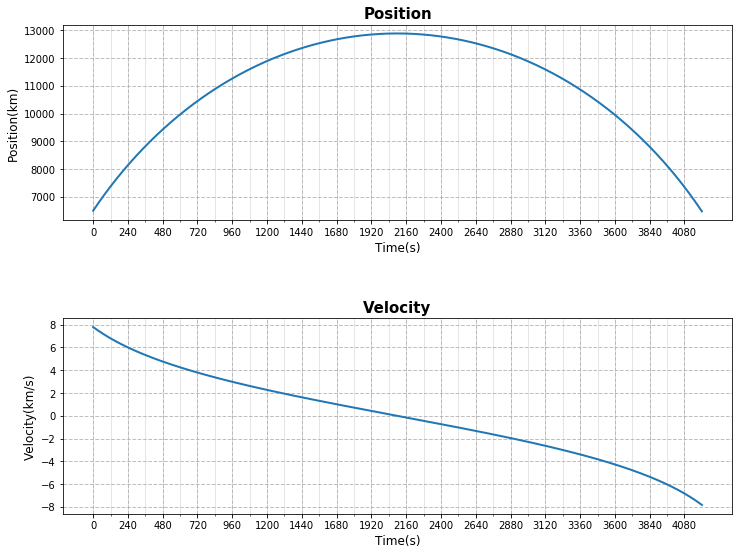

In [63]:
t_RKF45 = sol_RKF45[0]
y_position = []
y_velocity = []
for i in sol_RKF45[1]:
    y_position.append(i[0])

for i in sol_RKF45[1]:
    y_velocity.append(i[1])

major_xticks = np.arange(0, 70*60, 120*2)                                              
minor_xticks = np.arange(0, 70*60, 60*2)                                                   
    
fig = plt.figure(figsize=(12,9))
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)

'Plot the Position solution'
ax_pos = fig.add_subplot(211)
ax_pos.set_xticks(major_xticks)                                                       
ax_pos.set_xticks(minor_xticks, minor=True)                                           
ax_pos.grid(linestyle='--')
ax_pos.plot(t_RKF45, y_position, linewidth=2)
ax_pos.set_title("Position", fontsize=15, fontweight="bold")
ax_pos.grid(which='minor', alpha=0.4)                                                
ax_pos.grid(which='major', alpha=0.8,linewidth=1) 
ax_pos.tick_params(labelsize=10)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Position(km)', fontsize=12)

'Plot the Velocity solution'
ax_vel = fig.add_subplot(212)
ax_vel.set_xticks(major_xticks)                                                       
ax_vel.set_xticks(minor_xticks, minor=True)                                           
ax_vel.grid(linestyle='--')
ax_vel.plot(t_RKF45, y_velocity, linewidth=2)
ax_vel.set_title("Velocity", fontsize=15, fontweight="bold")
ax_vel.grid(which='minor', alpha=0.4)                                                
ax_vel.grid(which='major', alpha=0.8,linewidth=1) 
ax_vel.tick_params(labelsize=10)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Velocity(km/s)', fontsize=12)


plt.show()    